In [1]:
import tensorflow as tf
# Load and prepare the MNIST dataset.
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**1. Perform Exploratory Data Analysis (EDA) on X_train and discuss the data and what
you observe prior to beginning modeling (visualize the images)**

In [3]:
num_images = len(X_train)
print("Number of images in X_train:", num_images)

Number of images in X_train: 60000


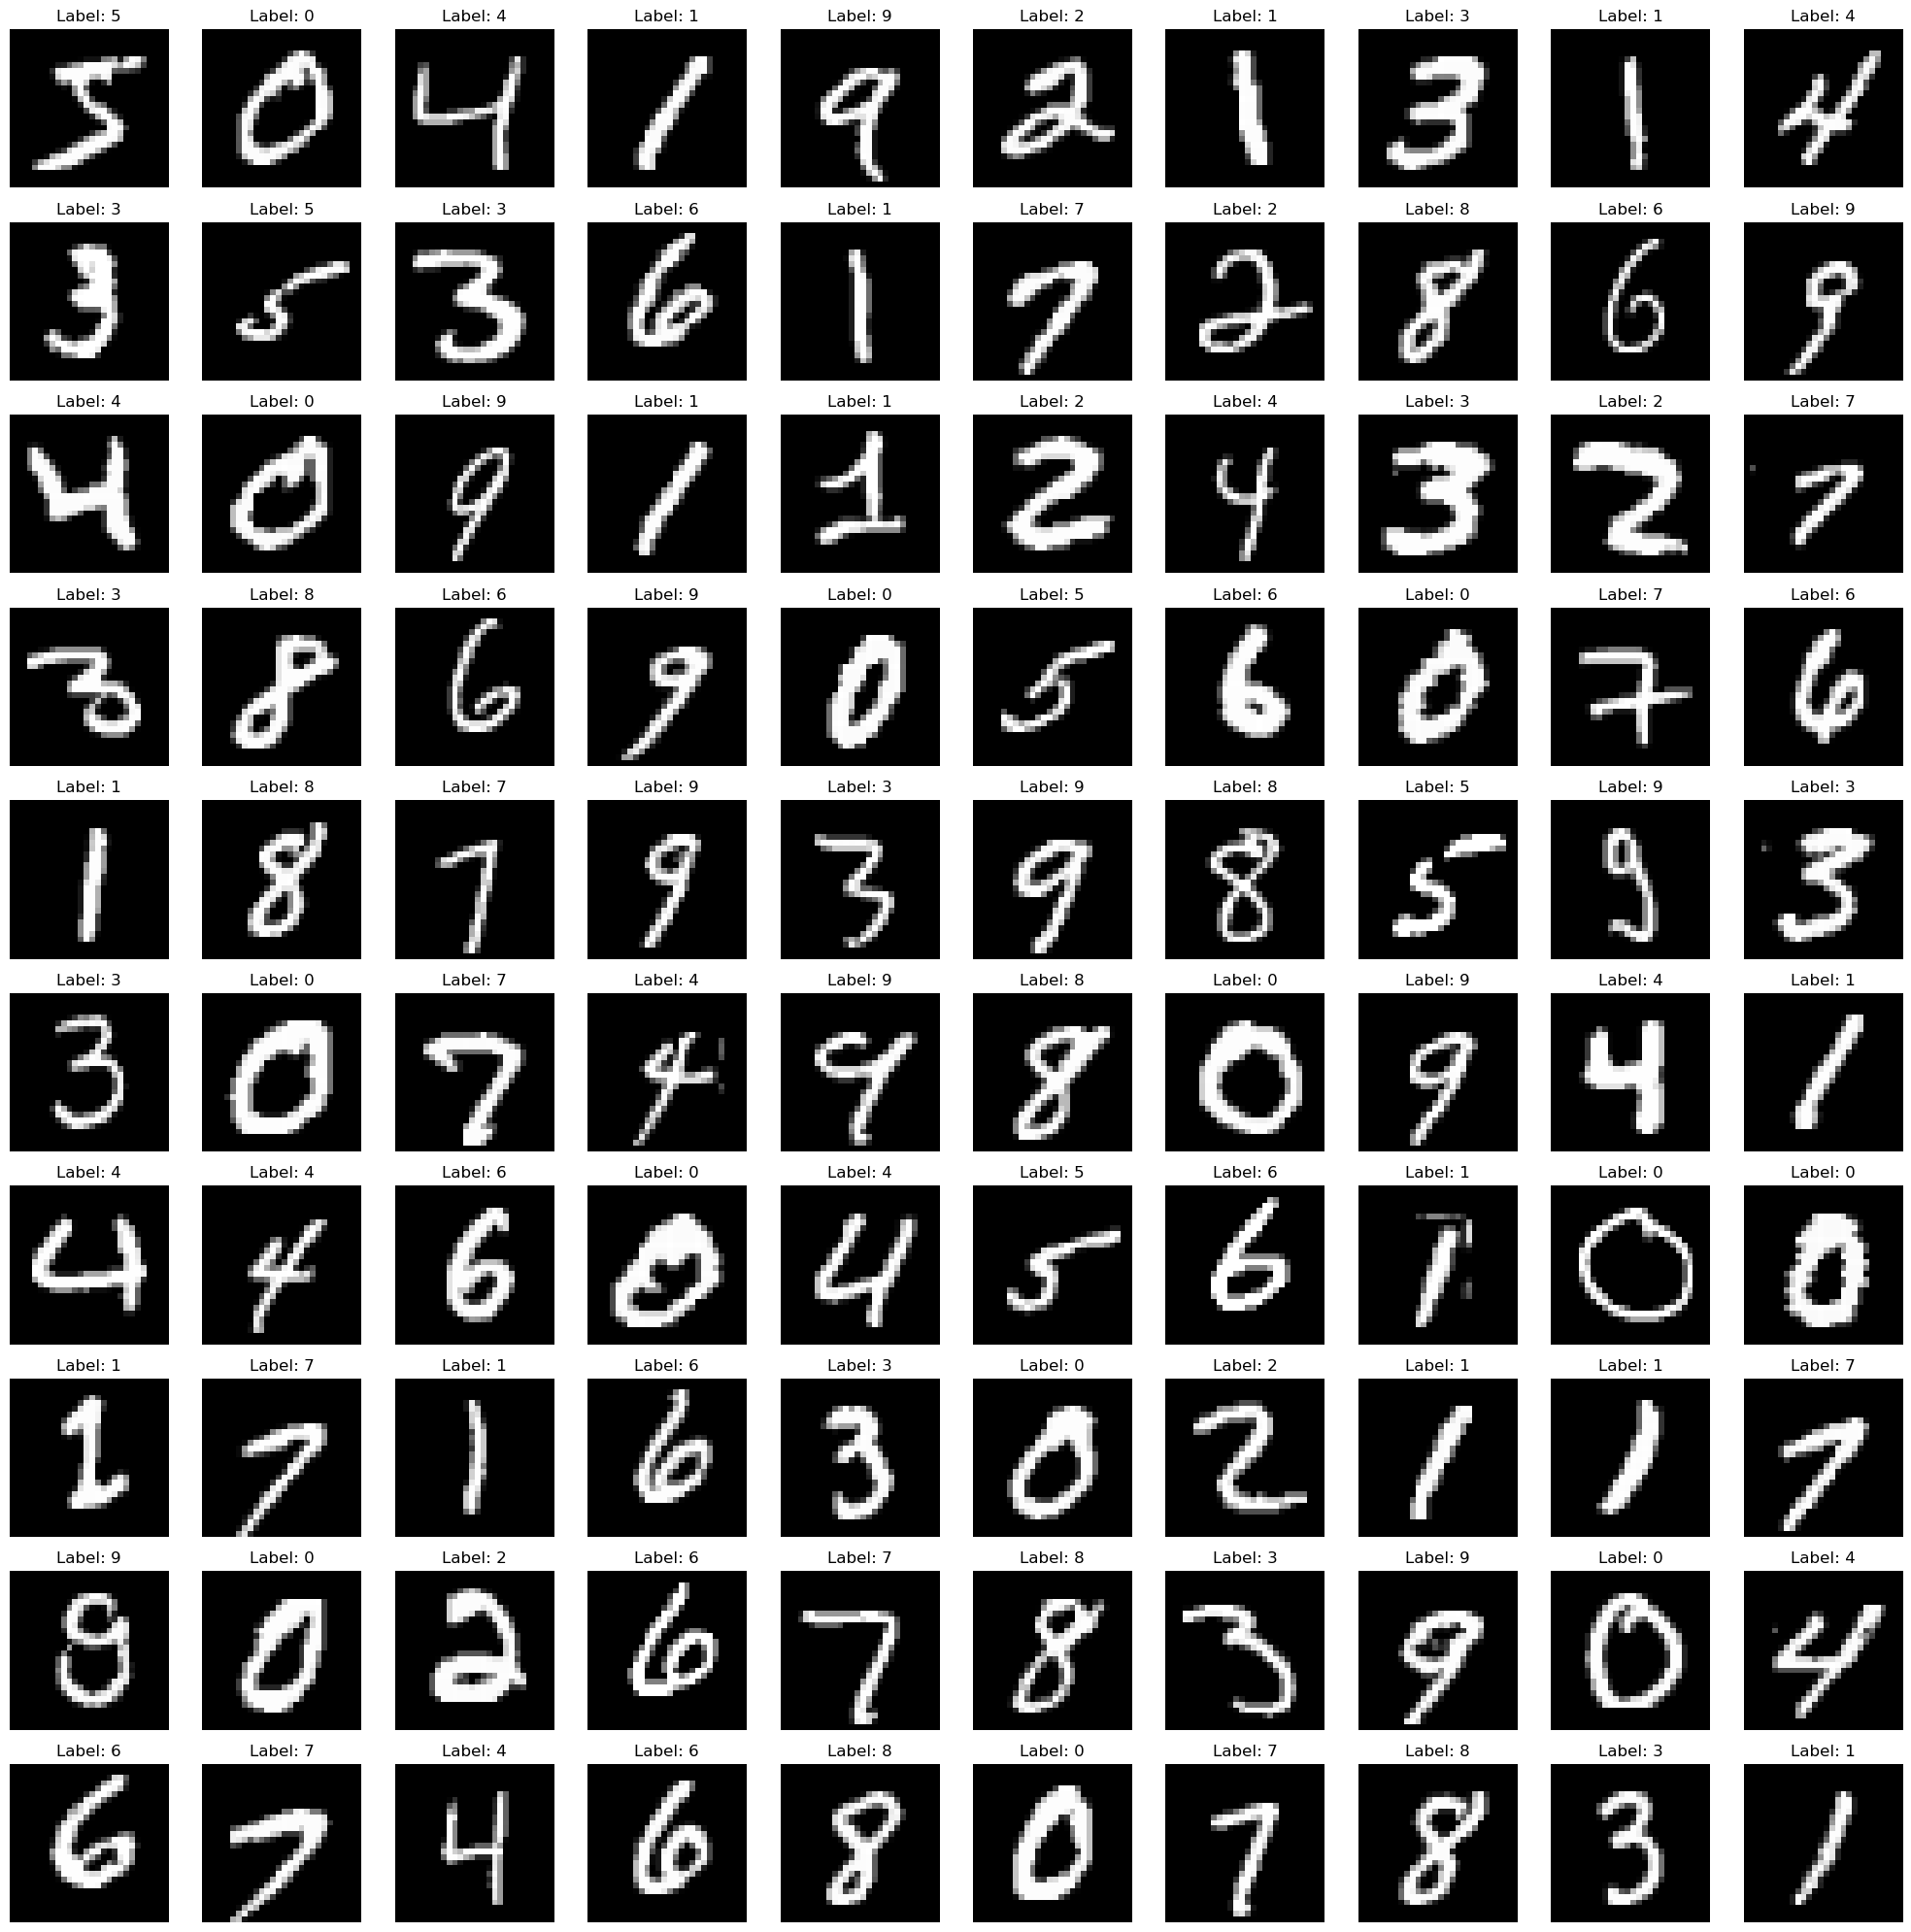

In [4]:
# Define the number of rows and columns for subplots
num_rows = 10
num_cols = 10  # Adjust this value as needed

# Plot the images
plt.figure(figsize=(num_cols * 2, num_rows * 2))
for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

There are some pixels in the images where it is seperate from the main body of the number. Some images contain pixels that make the image blurry.

**2. Normalize the image data so the pixel values are between 0 and 1.**

In [26]:
X_train_scaled, X_test_scaled = X_train / 255.0, X_test / 255.0

**3. Use PCA to reduce the 784 dimensions of the data to 32 dimensions using X_train**

In [6]:
num_samples, height, width = X_train_scaled.shape
X_train_flattened = X_train_scaled.reshape(num_samples, height * width) #make the 3d array into 2d for PCA

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=32)
X_train_reduced = pca.fit_transform(X_train_flattened) 

print('X shape:', X_train.shape)
print('X_reduced shape:', X_train_reduced.shape)

X shape: (60000, 28, 28)
X_reduced shape: (60000, 32)


**4. Transform X_train, discuss the original variance in X_train and how much variance is
explained by the 32 components. Plot the variance explained as a function of the
number of components used and explain why the shape of the plot is what it is (use
what we know about PCA)**

In [8]:
original_variance = np.var(X_train_flattened, axis=0)
total_original_variance = np.sum(original_variance)

print(f"Total original variance in the data: {total_original_variance}")

Total original variance in the data: 52.72503549512755


In [9]:
print(pca.explained_variance_)

[5.11687301 3.74139084 3.25270845 2.8416207  2.56711774 2.27366339
 1.72515498 1.52056024 1.45630525 1.24275009 1.11208951 1.06664054
 0.90468083 0.89218122 0.83235305 0.78190032 0.69838685 0.67325577
 0.62599518 0.60776299 0.56214568 0.53079612 0.50277962 0.4811453
 0.46578191 0.4425372  0.42842687 0.41460049 0.39261724 0.3641772
 0.34684348 0.34170074]


The above array is the variance explained by each of the 32 componenets. The use of the first component is the greatest one and the proceeding number of components variance are in ordered from left to right. 

In [10]:
cumsum = np.cumsum(pca.explained_variance_) #performs a cumulative sum of each component (biggest to smallest)
cumsum

array([ 5.11687301,  8.85826384, 12.1109723 , 14.95259299, 17.51971074,
       19.79337412, 21.51852911, 23.03908935, 24.4953946 , 25.73814469,
       26.8502342 , 27.91687474, 28.82155557, 29.71373679, 30.54608984,
       31.32799016, 32.026377  , 32.69963278, 33.32562796, 33.93339095,
       34.49553663, 35.02633274, 35.52911236, 36.01025765, 36.47603956,
       36.91857676, 37.34700363, 37.76160412, 38.15422136, 38.51839855,
       38.86524203, 39.20694278])

In [11]:
print("The remaining components variance explained:", total_original_variance-max(cumsum)) #unexplained variance

The remaining components variance explained: 13.518092715680218


In [12]:
max(cumsum)/total_original_variance*100 #percent of original variance explained after PCA

74.36115008982884

The total variance of all 784 components is 52.72. The 32 components explained variance is 39.2, explaining 74.36% percent of the original variance. The remaining unexplained variance is 13.51.

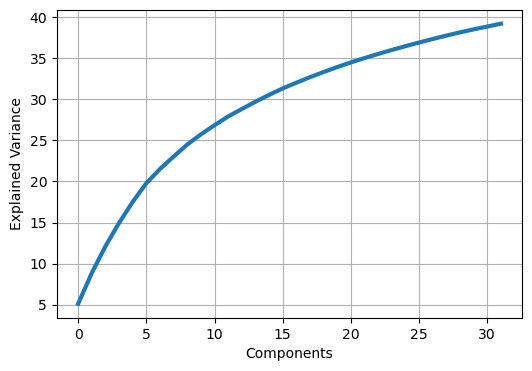

In [13]:
cumsum = np.cumsum(pca.explained_variance_)

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.xlabel("Components")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()

It is shaped like that plot above because so much variance is explained by the first few componenets. The variance explained for each componenet does decrease. So as the the number of componenets increase, the cumaltive variance does increase, but slowly since the variance explained from each increasing component gets smaller resulting in this curve. The goal in PCA is to capture as much variance as possible from one component.

**5. Using the transform fit on X_train, transform X_test and discuss the original variance
in X_test and how much variance is explained on X_test by the 32 components**

In [14]:
num_samples, height, width = X_test_scaled.shape
X_test_flattened = X_test_scaled.reshape(num_samples, height * width) 

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=32)
X_test_reduced = pca.fit_transform(X_test_flattened)

print('X shape:', X_test.shape)
print('X_reduced shape:', X_test_reduced.shape)

X shape: (10000, 28, 28)
X_reduced shape: (10000, 32)


In [16]:
original_variance = np.var(X_test_flattened, axis=0)
total_original_variance = np.sum(original_variance)

print(f"Total original variance in the data: {total_original_variance}")

Total original variance in the data: 52.84824867142073


In [17]:
print(pca.explained_variance_)

[5.31054516 3.9875278  3.24547981 2.86773096 2.65919285 2.24435311
 1.75019392 1.55933166 1.44282629 1.20402539 1.12784086 1.10738922
 0.91219814 0.89098258 0.83301257 0.78992897 0.68842066 0.67571521
 0.62373428 0.60691684 0.56363503 0.54289961 0.51781326 0.47666423
 0.46945999 0.43686887 0.42268708 0.4047344  0.37920831 0.36315159
 0.34305588 0.33136299]


In [18]:
cumsum = np.cumsum(pca.explained_variance_) #performs a cumulative sum of each component (biggest to smallest)
cumsum

array([ 5.31054516,  9.29807296, 12.54355277, 15.41128373, 18.07047658,
       20.31482968, 22.0650236 , 23.62435526, 25.06718154, 26.27120693,
       27.39904779, 28.50643702, 29.41863516, 30.30961774, 31.14263031,
       31.93255928, 32.62097994, 33.29669515, 33.92042942, 34.52734626,
       35.09098129, 35.6338809 , 36.15169416, 36.62835839, 37.09781838,
       37.53468725, 37.95737433, 38.36210872, 38.74131703, 39.10446862,
       39.4475245 , 39.77888749])

In [19]:
print("The remaining components variance explained:", total_original_variance-max(cumsum))

The remaining components variance explained: 13.069361185126503


In [20]:
max(cumsum)/total_original_variance*100

75.27002026806207

The total variance of all 784 components is 52.8. The 32 components explained variance is 39.7, explaining 75.27% percent of the original variance. The remaining unexplained variance is 13.06.

**6. Compare results from #4 and #5**

The orignal variance in #5 (52.84) is greater than the original variance in #4 (52.72). After reducing the dimensions to 32, #5 (39.77) explains more variance compared to #4 (39.2). PCA explains more variance in #5 compared to #4.

## Part B

X_train_scaled, X_test_scaled = X_train / 255.0, X_test / 255.0

**2. Build an autoencoder (either at least 1 hidden layer or using CNN) that will reduce the
784 dimensions of the data to 32 dimensions**

In [21]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1)) 

#encoder reduce to 32 dimensions
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img) 
x = layers.MaxPooling2D((2, 2), padding='same')(x)  
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(2, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

#reconstruct
x = layers.Conv2D(2, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

**3. Train an autoencoder on X_train. Discuss the original variance in X_train and how
much variance is explained by the 32 dimensions.**

In [27]:
# Reshape the input data to fit the model input shape (add a channel dimension)
X_train_scaled = np.reshape(X_train_scaled, (len(X_train), 28, 28, 1))
X_test_scaled = np.reshape(X_test_scaled, (len(X_test), 28, 28, 1))

# Fit the autoencoder to the training data
autoencoder.fit(X_train_scaled, X_train_scaled,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test_scaled, X_test_scaled))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - loss: 0.1242 - val_loss: 0.1221
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 0.1235 - val_loss: 0.1214
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 0.1224 - val_loss: 0.1209
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 0.1221 - val_loss: 0.1203
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 0.1215 - val_loss: 0.1205
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 0.1206 - val_loss: 0.1193
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 0.1205 - val_loss: 0.1186
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - loss: 0.1200 - val_loss: 0.1187
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - loss: 0.1195 - val_loss: 0.1180
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 0.1190 - val_loss: 0.1179


In [29]:
train_imgs = autoencoder.predict(X_train_scaled) #have train data run through autoencoder

original_variance = np.var(X_train_scaled, axis=0)
total_original_variance = np.sum(original_variance)

# Calculate the variance explained by the 32 dimensions
total_train_variance = np.sum(np.var(train_imgs, axis=0))

print("Total Variance of Original Data:", total_original_variance)
print("Variance Explained by 32 Dimensions:", total_train_variance)

print("The remaining components variance explained:", total_original_variance-total_train_variance)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step
Total Variance of Original Data: 52.72503549512755
Variance Explained by 32 Dimensions: 35.400883
The remaining components variance explained: 17.324152774180284


In [30]:
total_train_variance/total_original_variance*100

67.14245403252265

The total variance of all 784 components is 52.7. The 32 components explained variance is 35.4, explaining 67.142% percent of the original variance. The remaining unexplained variance is 17.32.

**4. Using the model trained on X_train, transform X_test and discuss the original variance
in X_test and how much variance is explained on X_test by the 32 dimensions of the
autoencoder.**

In [32]:
test_imgs = autoencoder.predict(X_test_scaled) #have test data run through autoencoder

original_variance = np.var(X_test_scaled, axis=0)
total_original_variance = np.sum(original_variance)

# Calculate the variance explained by the 32 dimensions
total_test_variance = np.sum(np.var(test_imgs, axis=0))

print("Total Variance of Original Data:", total_original_variance)
print("Variance Explained by 32 Dimensions:", total_test_variance)

print("The remaining components variance explained:", total_original_variance-total_test_variance)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Total Variance of Original Data: 52.84824867142073
Variance Explained by 32 Dimensions: 35.612907
The remaining components variance explained: 17.235341261752758


In [33]:
total_test_variance/total_original_variance*100 

67.38710989476311

The total variance of all 784 components is 52.8. The 32 components explained variance is 35.6, explaining 67.387% percent of the original variance. The remaining unexplained variance is 17.23.

**5. Compare results from #3 and #4 and why it is important to test out of sample**

The orignal variance in #4 (52.84) is greater than the original variance in #3 (52.72). After reducing the dimensions to 32, #4 (35.61) explains more variance compared to #3 (35.4). It is important to test out of sample escpicially with an autoencoder becuase the autoencoder might possibly overfit, so the use of out of sample data is needed in case the autoencoder doesn't generalize for just what was fit.  

## Part C

*Discuss which approach explained more variance of the mnist data and why this might be the
case (not just based on number of parameters). Also, discuss how many parameters each
model/transform uses and which uses more parameters. Lastly, discuss when you may want to
use these approaches*

PCA explains more variance than the autoencoder. PCA explains more variance because of linear projection, PCA is able to effectively capture more variance since the variance is close to being linear. Other reasons might be because it probably didn't overfit the data since it tries to capture as much variance as possible. In PCA, the number of parameters used is 32*784=25,088. The autoencoder uses 8,909 parameters. PCA uses more parameters. For PCA, I'll use it when the data can be modeled linearly. If the features are highly non-linear and modeled as such, then I would use an autoencoder instead. PCA mostly is used for dimensionality reduction while CNN autoencoders are used for reconstruction of images. 

In [34]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 2)        │           146 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 2)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 2)        │            38 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 8, 8, 2)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 8)        │           152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,909 (34.80 KB)

 Trainable params: 2,969 (11.60 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,940 (23.21 KB)